In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.load("sweep_results.npz")
results = data["results"]
snr = data["snr"]
n_spectra = data["n_spectra"]

In [ ]:
# Datastructure:
# (
#  11,     number of spectra grid points
#  11,     number of snr grid points
#  3,      0: y_pred, 1: y_pred_std, 2: y_refbox
#  4       0: Omega_m, 1: Omega_b, 2: Omega_Lambda, 3: H0
# )      
print(results.shape)

(11, 11, 3, 4)


In [ ]:
sigmas = abs(results[:, :, 0, :] - results[:, :, 2, :])/results[:, :, 1, :]
print(sigmas.shape)

(11, 11, 4)


/tmp/ipykernel_1633/1716995095.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


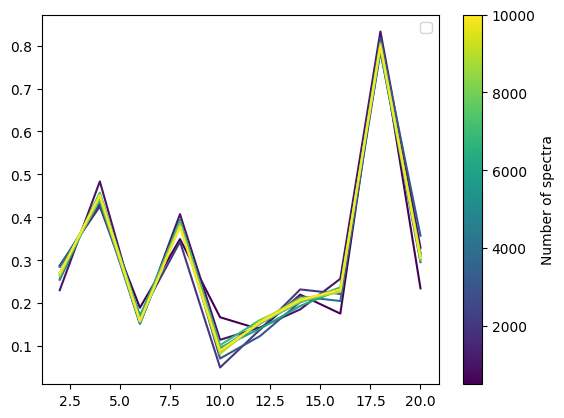

In [ ]:
fig, ax = plt.subplots()

cmap = plt.get_cmap("viridis")  # can be 'plasma', 'cool', 'cividis', etc.
norm = plt.Normalize(vmin=n_spectra.min(), vmax=n_spectra.max())

for n_spec in n_spectra:
    mask = np.where(n_spectra == n_spec)
    y = np.squeeze(sigmas[mask, :, 1])

    color = cmap(norm(n_spec))

    ax.plot(snr[:-1], y[:-1], color=color)

plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax, label="Number of spectra")
plt.legend()
plt.show()

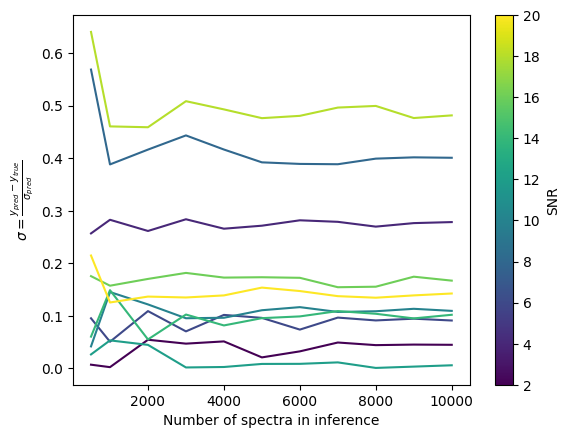

In [ ]:
fig, ax = plt.subplots()

snr_no_100 = snr[:-1]

cmap = plt.get_cmap("viridis")  # can be 'plasma', 'cool', 'cividis', etc.
norm = plt.Normalize(vmin=snr_no_100.min(), vmax=snr_no_100.max())

for n_snr in snr_no_100:
    mask = np.where(snr_no_100 == n_snr)
    y = np.squeeze(sigmas[:, mask, 0])

    color = cmap(norm(n_snr))

    ax.plot(n_spectra, y, color=color)

plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax, label="SNR")
plt.xlabel("Number of spectra in inference")
plt.ylabel(r"$\sigma = \frac{y_{pred} - y_{true}}{\sigma_{pred}}$")
plt.show()

(11, 11, 4)


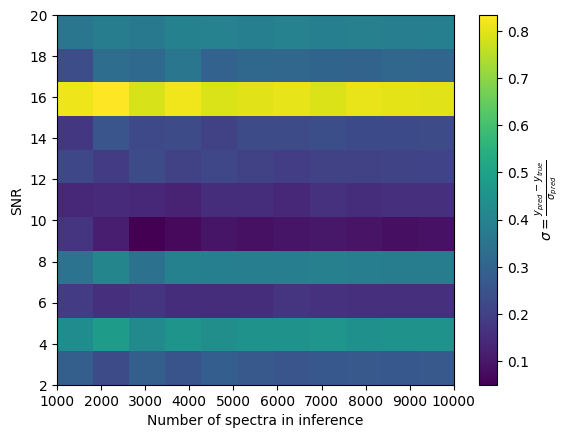

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example shapes
n_spectra_plot = n_spectra[1:]
snr_plot = snr[:-1]

sigmas = abs(results[:, :, 0, :] - results[:, :, 2, :])/results[:, :, 1, :]
print(sigmas.shape)

# Extract the sigma you want to plot
sigma_to_plot = sigmas[:, :, 1]  # shape: (n_spectra, snr)

# Transpose if you want snr on Y-axis, n_spectra on X-axis
sigma_to_plot = sigma_to_plot.T  # now shape: (snr, n_spectra)

# Create 2D plot
fig, ax = plt.subplots()
c = ax.imshow(sigma_to_plot, 
              origin='lower',  # so smaller values of snr are at bottom
              aspect='auto', 
              extent=[n_spectra_plot.min(), n_spectra_plot.max(), snr_plot.min(), snr_plot.max()],
              cmap='viridis')

ax.set_xlabel("Number of spectra in inference")
ax.set_ylabel("SNR")
fig.colorbar(c, ax=ax, label=r"$\sigma = \frac{y_{pred} - y_{true}}{\sigma_{pred}}$")
plt.show()


(11, 11, 4)


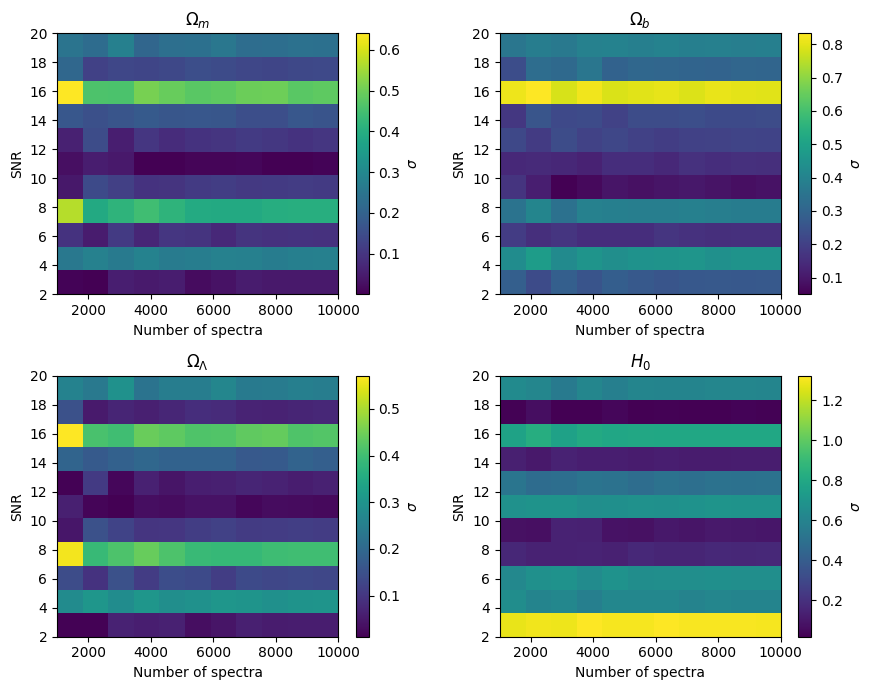

In [ ]:
n_spectra_plot = n_spectra[1:]
snr_plot = snr[:-1]

sigma_to_plot = abs(results[:, :, 0, :] - results[:, :, 2, :])/results[:, :, 1, :]
print(sigma_to_plot.shape)

# Create figure and axes: 2x2
fig, axes = plt.subplots(2, 2, figsize=(9, 7))
axes = axes.flatten()  # flatten for easy indexing
params = [r"$\Omega_m$", r"$\Omega_b$", r"$\Omega_\Lambda$", r"$H_0$"]

# Loop over the 4 metrics
for i in range(4):
    ax = axes[i]
    # Extract metric i, transpose so snr on y-axis
    data = sigma_to_plot[:, :, i].T  # shape: (snr, n_spectra)
    
    # Plot heatmap
    c = ax.imshow(data, 
              origin='lower',  # so smaller values of snr are at bottom
              aspect='auto', 
              extent=[n_spectra_plot.min(), n_spectra_plot.max(), snr_plot.min(), snr_plot.max()],
              cmap='viridis')
    
    ax.set_title(params[i])
    ax.set_xlabel("Number of spectra")
    ax.set_ylabel("SNR")
    
    # Add colorbar to each subplot
    fig.colorbar(c, ax=ax, label=r"$\sigma$")

plt.tight_layout()
plt.savefig("plots/sigma_2d_plots.pdf", format="PDF")
plt.show()

(11, 11, 4)


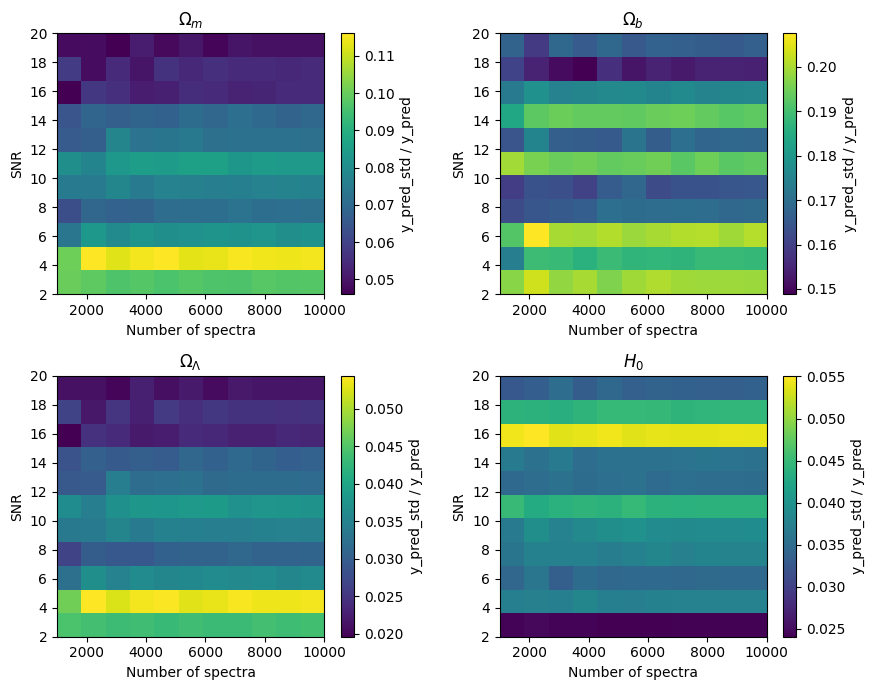

In [ ]:
n_spectra_plot = n_spectra[1:]
snr_plot = snr[:-1]

sigma_to_plot = results[:, :, 1, :]/results[:, :, 0, :]
print(sigmas.shape)

# Create figure and axes: 2x2
fig, axes = plt.subplots(2, 2, figsize=(9, 7))
axes = axes.flatten()  # flatten for easy indexing
params = [r"$\Omega_m$", r"$\Omega_b$", r"$\Omega_\Lambda$", r"$H_0$"]

# Loop over the 4 metrics
for i in range(4):
    ax = axes[i]
    # Extract metric i, transpose so snr on y-axis
    data = sigma_to_plot[:, :, i].T  # shape: (snr, n_spectra)
    
    # Plot heatmap
    c = ax.imshow(data, 
              origin='lower',  # so smaller values of snr are at bottom
              aspect='auto', 
              extent=[n_spectra_plot.min(), n_spectra_plot.max(), snr_plot.min(), snr_plot.max()],
              cmap='viridis')
    
    ax.set_title(params[i])
    ax.set_xlabel("Number of spectra")
    ax.set_ylabel("SNR")
    
    # Add colorbar to each subplot
    fig.colorbar(c, ax=ax, label="y_pred_std / y_pred")

plt.tight_layout()
plt.show()

(11, 11, 4)


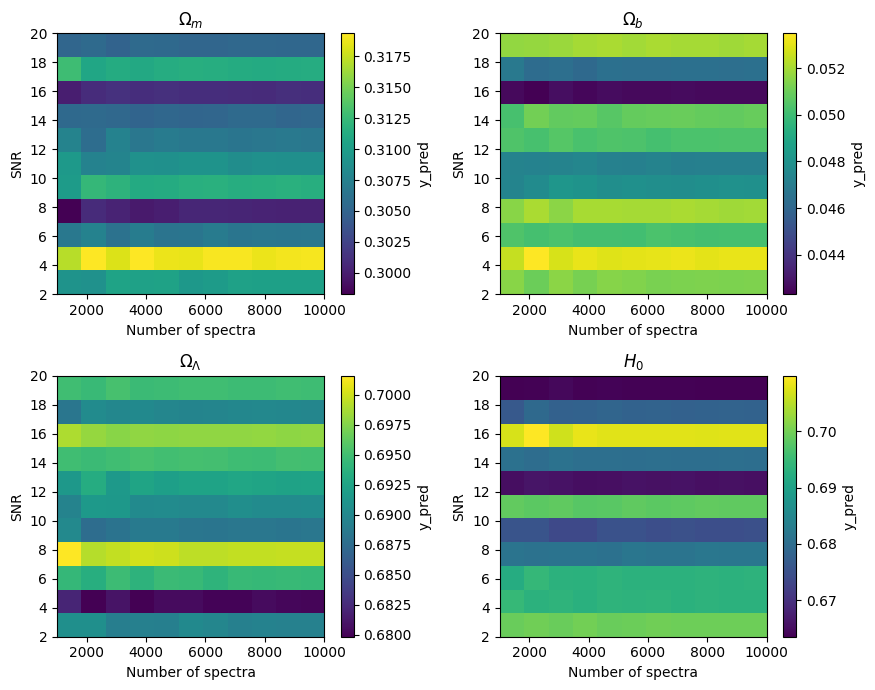

In [ ]:
n_spectra_plot = n_spectra[1:]
snr_plot = snr[:-1]

sigma_to_plot = results[:, :, 0, :]
print(sigmas.shape)

# Create figure and axes: 2x2
fig, axes = plt.subplots(2, 2, figsize=(9, 7))
axes = axes.flatten()  # flatten for easy indexing
params = [r"$\Omega_m$", r"$\Omega_b$", r"$\Omega_\Lambda$", r"$H_0$"]

# Loop over the 4 metrics
for i in range(4):
    ax = axes[i]
    # Extract metric i, transpose so snr on y-axis
    data = sigma_to_plot[:, :, i].T  # shape: (snr, n_spectra)
    
    # Plot heatmap
    c = ax.imshow(data, 
              origin='lower',  # so smaller values of snr are at bottom
              aspect='auto', 
              extent=[n_spectra_plot.min(), n_spectra_plot.max(), snr_plot.min(), snr_plot.max()],
              cmap='viridis')
    
    ax.set_title(params[i])
    ax.set_xlabel("Number of spectra")
    ax.set_ylabel("SNR")
    
    # Add colorbar to each subplot
    fig.colorbar(c, ax=ax, label="y_pred")

plt.tight_layout()
plt.show()

(11, 11, 4)


/tmp/ipykernel_1633/2513973969.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


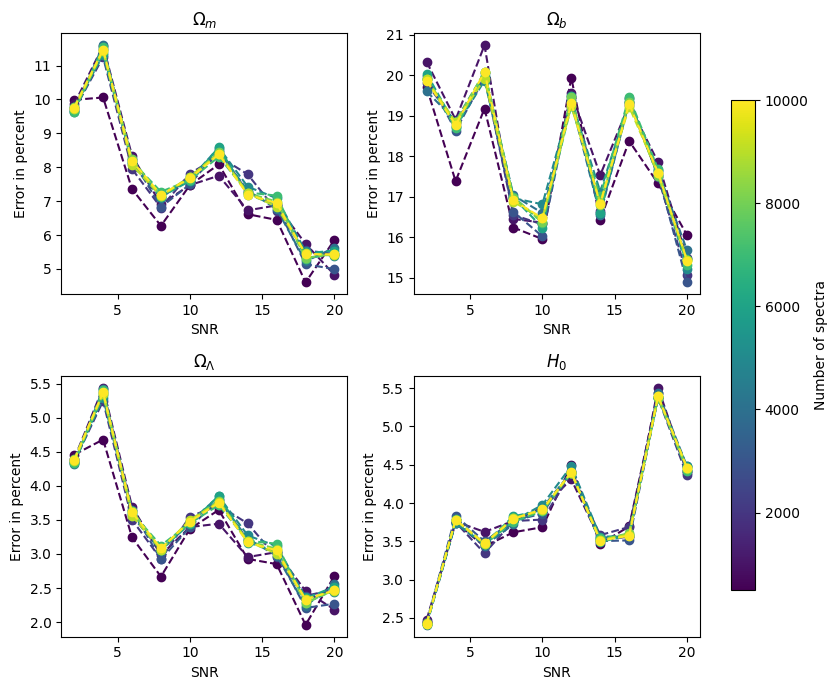

In [ ]:
n_spectra_plot = n_spectra[1:]
snr_plot = snr[:-1]

sigma_to_plot = results[:, :, 1, :]/results[:, :, 0, :]
print(sigmas.shape)

# Create figure and axes: 2x2
fig, axes = plt.subplots(2, 2, figsize=(9, 7))
axes = axes.flatten()  # flatten for easy indexing
params = [r"$\Omega_m$", r"$\Omega_b$", r"$\Omega_\Lambda$", r"$H_0$"]

# Loop over the 4 metrics
for i in range(4):
    ax = axes[i]

    cmap = plt.get_cmap("viridis")  # can be 'plasma', 'cool', 'cividis', etc.
    norm = plt.Normalize(vmin=n_spectra.min(), vmax=n_spectra.max())

    # Extract metric i, transpose so snr on y-axis
    for j in n_spectra:
        mask = np.where(n_spectra == j)
        y = np.squeeze(sigma_to_plot[mask, :-1, i]) * 100
        x = snr_plot
        color = cmap(norm(j))
        ax.plot(x, y, marker="o", linestyle="--", color=color)

    ax.set_title(params[i])
    ax.set_ylabel("Error in percent")
    ax.set_xlabel("SNR")

cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),cax=cbar_ax, label="Number of spectra" , orientation='vertical', fraction=0.05, pad=0.02)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig("plots/Error_vs_SNR.pdf", format="PDF")
plt.show()